# Lending Club Case Study

In [1453]:
# load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data file

In [1454]:
df = pd.read_csv("loan.csv", low_memory=False)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Analyse data

In [1455]:

df.shape

(39717, 111)

In [1456]:
df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Identify Missing Values

In [1457]:
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [1458]:
pd.DataFrame(df.isnull().mean().round(4) * 100, columns=['percentage_missing_value']).sort_values(by=['percentage_missing_value'])

,percentage_missing_value
id,0.00
earliest_cr_line,0.00
inq_last_6mths,0.00
open_acc,0.00
pub_rec,0.00
revol_bal,0.00
total_acc,0.00
initial_list_status,0.00
out_prncp,0.00
out_prncp_inv,0.00


In [1459]:
prc_missing_col = pd.DataFrame(df.isnull().mean().round(4) * 100, columns=['percentage_missing_value'])

In [1460]:
print(f"{round(prc_missing_col[prc_missing_col['percentage_missing_value'] == 0].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have no missing value")
print(f"{round(prc_missing_col[(prc_missing_col['percentage_missing_value'] > 0) & (prc_missing_col['percentage_missing_value'] <= 10)].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have missing value between 0-10%")
print(f"{round(prc_missing_col[(prc_missing_col['percentage_missing_value'] > 10) & (prc_missing_col['percentage_missing_value'] <= 50)].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have missing value between 10-50%")
print(f"{round(prc_missing_col[(prc_missing_col['percentage_missing_value'] > 50) & (prc_missing_col['percentage_missing_value'] < 100)].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have missing value between 50-100%")
print(f"{round(prc_missing_col[prc_missing_col['percentage_missing_value'] == 100].count() / len(prc_missing_col) * 100, 2)['percentage_missing_value']}% of columns have 100% missing value")

38.74% of columns have no missing value
9.01% of columns have missing value between 0-10%
0.9% of columns have missing value between 10-50%
2.7% of columns have missing value between 50-100%
48.65% of columns have 100% missing value


## Handle Missing Values

In [1461]:
missing_col = df.isnull().mean().round(4) * 100
df = df.drop(columns=missing_col[missing_col == 100].index.tolist())

In [1462]:
df.shape

(39717, 57)

In [1463]:
df['next_pymnt_d'].describe()

count       1140
unique         2
top       Jun-16
freq        1125
Name: next_pymnt_d, dtype: object

In [1464]:
df['next_pymnt_d'].value_counts(normalize=True)*100

Jun-16    98.684211
Jul-16     1.315789
Name: next_pymnt_d, dtype: float64

In [1465]:
df[['loan_status', 'next_pymnt_d']]

,loan_status,next_pymnt_d
0,Fully Paid,NaN
1,Charged Off,NaN
2,Fully Paid,NaN
3,Fully Paid,NaN
4,Current,Jun-16
...,...,...
39712,Fully Paid,NaN
39713,Fully Paid,NaN
39714,Fully Paid,NaN
39715,Fully Paid,NaN


In [1466]:
df.groupby('loan_status')['next_pymnt_d'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     5627
Current            0
Fully Paid     32950
Name: next_pymnt_d, dtype: int64

In [1467]:
df['mths_since_last_record'].describe()

count    2786.000000
mean       69.698134
std        43.822529
min         0.000000
25%        22.000000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [1468]:
df['mths_since_last_record'].value_counts(normalize=True)*100

0.0      24.048816
104.0     2.189519
89.0      2.153625
113.0     2.117732
111.0     2.045944
94.0      1.974156
108.0     1.974156
87.0      1.938263
93.0      1.938263
110.0     1.902369
106.0     1.902369
88.0      1.902369
100.0     1.902369
109.0     1.866475
86.0      1.830581
96.0      1.830581
97.0      1.830581
114.0     1.830581
99.0      1.794688
101.0     1.794688
90.0      1.758794
103.0     1.758794
107.0     1.722900
117.0     1.687006
85.0      1.687006
91.0      1.579325
92.0      1.579325
102.0     1.543431
98.0      1.507538
116.0     1.471644
95.0      1.435750
105.0     1.435750
112.0     1.399856
115.0     1.328069
118.0     1.292175
76.0      0.538406
63.0      0.538406
61.0      0.502513
58.0      0.466619
80.0      0.430725
67.0      0.394831
55.0      0.394831
81.0      0.394831
69.0      0.394831
77.0      0.358938
119.0     0.358938
54.0      0.358938
73.0      0.323044
72.0      0.323044
50.0      0.323044
64.0      0.323044
53.0      0.323044
70.0      0.

In [1469]:
df[['loan_status', 'mths_since_last_record']]

,loan_status,mths_since_last_record
0,Fully Paid,NaN
1,Charged Off,NaN
2,Fully Paid,NaN
3,Fully Paid,NaN
4,Current,NaN
...,...,...
39712,Fully Paid,0.0
39713,Fully Paid,0.0
39714,Fully Paid,0.0
39715,Fully Paid,0.0


In [1470]:
df.groupby('loan_status')['mths_since_last_record'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     5049
Current         1094
Fully Paid     30788
Name: mths_since_last_record, dtype: int64

In [1471]:
df['mths_since_last_delinq'].describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [1472]:
df['mths_since_last_delinq'].value_counts(normalize=True)*100

0.0      3.156395
15.0     1.795511
30.0     1.759886
23.0     1.759886
24.0     1.717136
19.0     1.695761
38.0     1.688636
20.0     1.660135
18.0     1.645885
22.0     1.645885
31.0     1.631635
35.0     1.617385
32.0     1.610260
39.0     1.596010
25.0     1.588885
45.0     1.581760
26.0     1.546135
37.0     1.546135
21.0     1.539010
16.0     1.524760
17.0     1.524760
27.0     1.510509
36.0     1.496259
42.0     1.482009
10.0     1.482009
29.0     1.474884
47.0     1.467759
34.0     1.432134
43.0     1.432134
44.0     1.425009
14.0     1.410759
41.0     1.403634
46.0     1.403634
40.0     1.403634
12.0     1.389384
48.0     1.382259
28.0     1.375134
6.0      1.368009
33.0     1.339508
9.0      1.296758
7.0      1.254008
13.0     1.218383
8.0      1.197007
11.0     1.182757
4.0      1.090132
49.0     1.083007
5.0      1.075882
58.0     1.054507
3.0      1.033131
53.0     1.018881
59.0     1.018881
52.0     0.976131
56.0     0.954756
73.0     0.933381
50.0     0.933381
55.0     0

In [1473]:
df[['loan_status', 'mths_since_last_delinq']]

,loan_status,mths_since_last_delinq
0,Fully Paid,NaN
1,Charged Off,NaN
2,Fully Paid,NaN
3,Fully Paid,35.0
4,Current,38.0
...,...,...
39712,Fully Paid,0.0
39713,Fully Paid,5.0
39714,Fully Paid,0.0
39715,Fully Paid,0.0


In [1474]:
df.groupby('loan_status')['mths_since_last_delinq'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     3485
Current          777
Fully Paid     21420
Name: mths_since_last_delinq, dtype: int64

In [1475]:
df['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [1476]:
df.groupby('loan_status')['desc'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     1802
Current          413
Fully Paid     10725
Name: desc, dtype: int64

In [1477]:
df.drop('desc', axis=1, inplace=True)

In [1478]:
df.shape

(39717, 56)

In [1479]:
df['emp_title'].describe()

count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

In [1480]:
df['emp_title'].head()

0                         NaN
1                       Ryder
2                         NaN
3         AIR RESOURCES BOARD
4    University Medical Group
Name: emp_title, dtype: object

In [1481]:
df.groupby('loan_status')['emp_title'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     484
Current          73
Fully Paid     1902
Name: emp_title, dtype: int64

In [1482]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [1483]:
df['emp_length'].value_counts(normalize=True)*100

10+ years    22.977589
< 1 year     11.860152
2 years      11.355520
3 years      10.597278
4 years       8.891879
5 years       8.493349
1 year        8.384659
6 years       5.768335
7 years       4.588272
8 years       3.827442
9 years       3.255525
Name: emp_length, dtype: float64

In [1484]:
df.groupby('loan_status')['emp_length'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    228
Current         42
Fully Paid     805
Name: emp_length, dtype: int64

In [1485]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)*100

0.0    95.691953
1.0     4.290108
2.0     0.017940
Name: pub_rec_bankruptcies, dtype: float64

In [1486]:
df['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [1487]:
df.groupby('loan_status')['pub_rec_bankruptcies'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    118
Current          0
Fully Paid     579
Name: pub_rec_bankruptcies, dtype: int64

In [1488]:
df['last_pymnt_d'].describe()

count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object

In [1489]:
df.groupby('loan_status')['last_pymnt_d'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    71
Current         0
Fully Paid      0
Name: last_pymnt_d, dtype: int64

In [1490]:
df['chargeoff_within_12_mths'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [1491]:
df['chargeoff_within_12_mths'].value_counts(normalize=True)*100

0.0    100.0
Name: chargeoff_within_12_mths, dtype: float64

In [1492]:
df.groupby('loan_status')['chargeoff_within_12_mths'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     6
Current         0
Fully Paid     50
Name: chargeoff_within_12_mths, dtype: int64

In [1493]:
df['chargeoff_within_12_mths'] = pd.to_numeric(df['chargeoff_within_12_mths'], errors='coerce')

In [1494]:
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

In [1495]:
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].astype(int)

In [1496]:
df.groupby('loan_status')['chargeoff_within_12_mths'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: chargeoff_within_12_mths, dtype: int64

In [1497]:
df['collections_12_mths_ex_med'].describe()

count    39661.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [1498]:
df['collections_12_mths_ex_med'].value_counts(normalize=True)*100

0.0    100.0
Name: collections_12_mths_ex_med, dtype: float64

In [1499]:
df.groupby('loan_status')['collections_12_mths_ex_med'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off     6
Current         0
Fully Paid     50
Name: collections_12_mths_ex_med, dtype: int64

In [1500]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [1501]:
df.groupby('loan_status')['collections_12_mths_ex_med'].apply(lambda x: x.isnull().sum())

loan_status
Charged Off    0
Current        0
Fully Paid     0
Name: collections_12_mths_ex_med, dtype: int64

## Filtering and correcting Data

In [1502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [1503]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq      

In [1504]:
df.apply(lambda x: x.unique())

id                            [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                     [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                     [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt_inv               [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
term                                                   [ 36 months,  60 months]
int_rate                      [10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...
installment                   [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...
grade                                                     [B, C, A, E, F, D, G]
sub_grade                     [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...
emp_title                     [nan, Ryder, AIR RESOURCES BOARD, University M...
emp_length                    [10+ years, < 1 year, 1 year, 3 years, 8 years...
home_ownership                          

In [1505]:
df = df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], axis=1)

In [1506]:
df.shape

(39717, 47)

In [1507]:
df['annual_inc'] = df['annual_inc'].round().astype(int)

df.annual_inc

0         24000
1         30000
2         12252
3         49200
4         80000
          ...  
39712    110000
39713     18000
39714    100000
39715    200000
39716     22000
Name: annual_inc, Length: 39717, dtype: int64

In [1508]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)

In [1509]:
df.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

## Univariate Analysis

In [1510]:
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

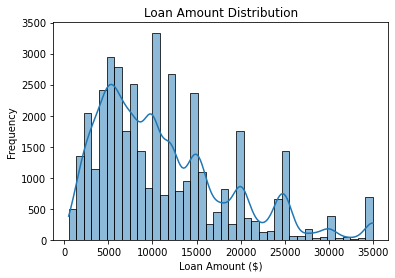

In [1511]:
sns.histplot(df['loan_amnt'], bins=40, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.show()

The distribution exhibits a rightward skew, indicating that a larger number of loans are issued for smaller amounts compared to those for larger sums. The highest concentration of loans occurs within the range of $5,000 to $10,000, signifying that this is the most frequently borrowed amount.

Additionally, there is an extended tail on the right side, which implies that some borrowers are taking out significantly larger loans. The histogram presents a bimodal distribution with two prominent peaks, suggesting the existence of two distinct groups of borrowers, each with varying loan requirements. Overall, the data indicates that while most loans are for smaller amounts, there is a smaller subset of loans for higher amounts.

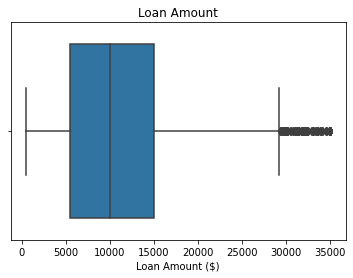

In [1512]:
sns.boxplot(x=df['loan_amnt'])
plt.title('Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.show()

The median loan amount is approximately $10,000, which falls within the interquartile range (IQR). This suggests that most loans are concentrated around this value. The distribution is notably right-skewed, as indicated by the extended whisker on the right side, implying that there are a considerable number of outliers (very large loan amounts) relative to the bulk of the loans. These outliers likely align with the larger loan amounts depicted in the histogram. The IQR further indicates that most loans fall within a relatively narrow range of amounts.

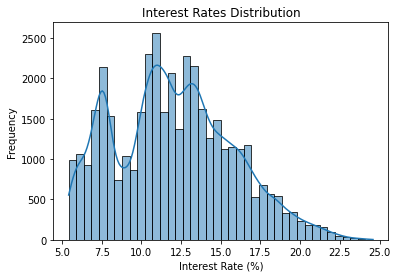

In [1513]:
sns.histplot(df['int_rate'], bins=40, kde=True)
plt.title('Interest Rates Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.show()

The right-skewed distribution implies that the lender's pricing strategy favors providing lower interest rates to a greater number of borrowers. The presence of multiple peaks in the distribution may indicate that the lender is catering to different customer segments with diverse interest rate options. While this approach of offering lower interest rates to a larger borrower base may enhance market share, it could also affect the lender's overall profitability.

In [1514]:
df['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

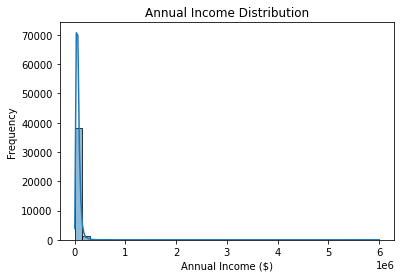

In [1515]:
sns.histplot(df['annual_inc'], bins=40, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.ylabel('Frequency')
plt.show()

The majority of borrowers exhibit lower annual incomes, while a smaller segment reports significantly higher incomes, indicating that the dataset is skewed towards lower-income individuals. The distribution displays a prominent peak near zero, which suggests that a substantial number of borrowers either report very low incomes or no income at all. This may be attributed to various factors, such as part-time work, self-employment, or dependence on alternative income sources.

Additionally, the distribution features a long tail on the right side, highlighting the presence of a few borrowers with exceptionally high incomes. Overall, the frequency of borrowers tends to decline as annual income increases.

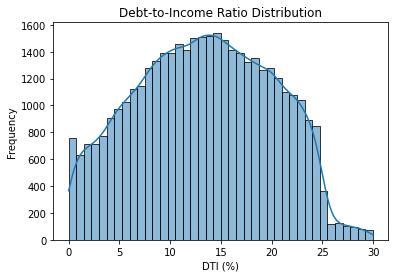

In [1516]:
sns.histplot(df['dti'], bins=40, kde=True)
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
plt.show()

The distribution exhibits a slight right skew, indicating that a greater proportion of borrowers have lower debt-to-income ratios compared to those with higher ratios. There is a distinct peak around the 10-15% range, suggesting that this is the most prevalent debt-to-income ratio among borrowers. Overall, **the distribution of debt-to-income ratios implies that most borrowers maintain manageable debt levels, while a smaller segment faces higher debt burdens.**

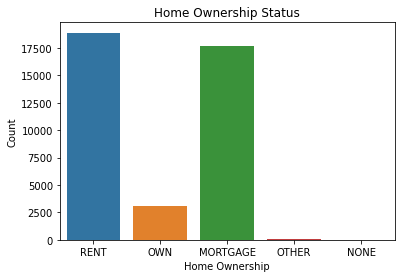

In [1517]:
sns.countplot(x='home_ownership', data=df)
plt.title('Home Ownership Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


**The distribution of homeownership status indicates that most borrowers are renters, followed by homeowners and mortgage holders. The categories labeled "OTHER" and "NONE" appear to be relatively uncommon.**

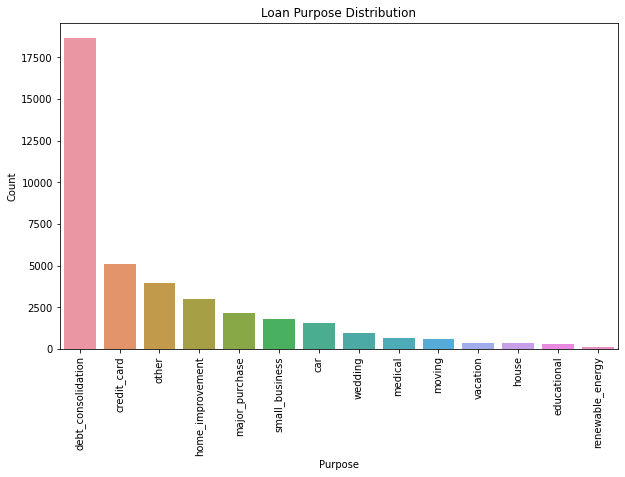

In [1518]:
plt.figure(figsize=(10, 6))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index)  # Countplot with vertical bars
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are too many categories
plt.show()

**The distribution of loan purposes reveals that debt consolidation is the most prevalent reason for borrowers seeking loans. Other common reasons include credit card debt and home improvements. Additionally, a range of other purposes is represented, highlighting the diverse needs of borrowers.**

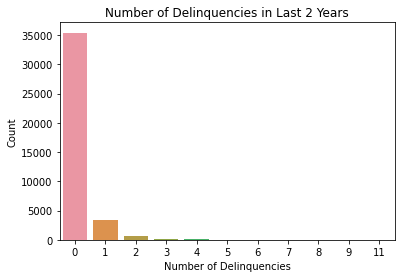

In [1519]:
sns.countplot(x='delinq_2yrs', data=df)
plt.title('Number of Delinquencies in Last 2 Years')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Count')
plt.show()

**The distribution of delinquencies over the past two years indicates that most borrowers have no reported delinquencies. A smaller percentage of borrowers have one or more delinquencies, with the frequency declining as the number of delinquencies increases.**

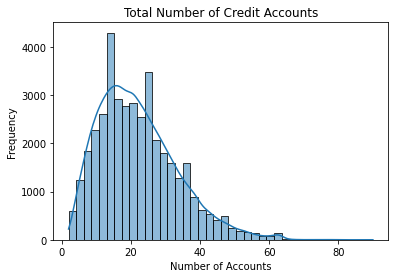

In [1520]:
sns.histplot(df['total_acc'], bins=40, kde=True)
plt.title('Total Number of Credit Accounts')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.show()

**The distribution of the total number of credit accounts indicates that most borrowers maintain a moderate number of accounts, while a smaller segment has a significantly higher number of accounts.**

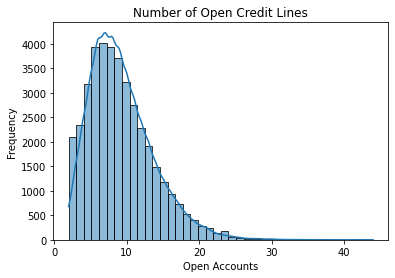

In [1521]:
sns.histplot(df['open_acc'], bins=40, kde=True)
plt.title('Number of Open Credit Lines')
plt.xlabel('Open Accounts')
plt.ylabel('Frequency')
plt.show()

**The distribution of open credit lines indicates that most borrowers have a moderate number of credit lines, while a smaller percentage holds a higher number of credit lines.**

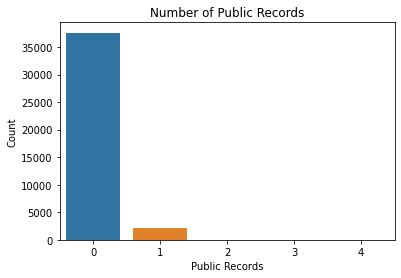

In [1522]:
sns.countplot(x='pub_rec', data=df)
plt.title('Number of Public Records')
plt.xlabel('Public Records')
plt.ylabel('Count')
plt.show()

**The distribution of public records indicates that most borrowers have no reported public records. A smaller percentage of borrowers have one or more public records, with frequency decreasing as the number of records increases.**

## Bivariate Analysis

**Essential Columns to Examine:**
1. Loan Details: `loan_amnt`, `funded_amnt`, `term`, `int_rate`, `installment`
2. Borrower’s Financial Profile: `annual_inc`, `dti`, `revol_util`
3. Credit Background: `inq_last_6mths`, `open_acc`, `total_acc`, `delinq_2yrs`, `pub_rec`
4. Employment Status and Verification: `emp_length`, `home_ownership`, `verification_status`
5. Status of the Loan: `loan_status` (target variable)

In [1523]:
subset = df[(df["loan_status"] == "Charged Off") | (df["loan_status"] == "Fully Paid")].copy()

Analysis of Categorical Variables
1. Grade
2. Term
3. Home Ownership
4. Verification Status
5. Employment Length
6. Annual Income
7. Loan Amount
8. Purpose of Loan

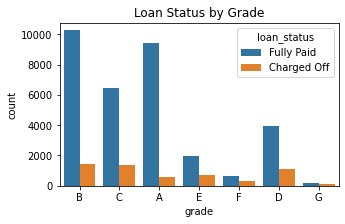

In [1524]:
plt.figure(figsize=(5, 3))
sns.countplot(x='grade', hue='loan_status', data=subset)
plt.title('Loan Status by Grade')
plt.show()

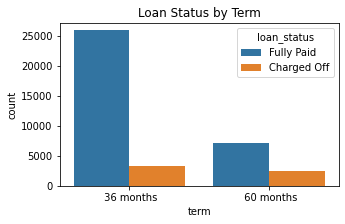

In [1525]:
plt.figure(figsize=(5, 3))
sns.countplot(x='term', hue='loan_status', data=subset)
plt.title('Loan Status by Term')
plt.show()

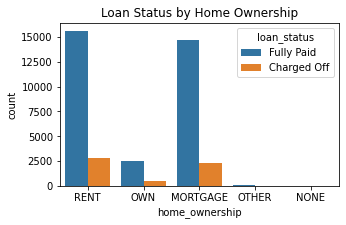

In [1526]:
plt.figure(figsize=(5, 3))
sns.countplot(x='home_ownership', hue='loan_status', data=subset)
plt.title('Loan Status by Home Ownership')
plt.show()

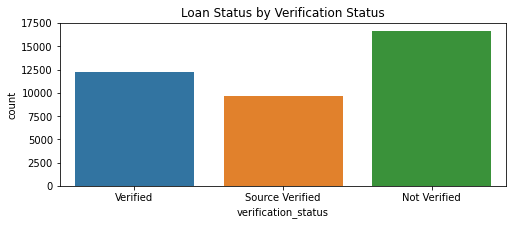

In [1527]:
plt.figure(figsize=(8, 3))
sns.countplot(x='verification_status', data=subset)
plt.title('Loan Status by Verification Status')
plt.show()

In [1528]:

emp_length_modified = df['emp_length'].str.replace('years', '').str.replace('year', '').str.strip()
emp_length_modified = emp_length_modified.replace({'< 1': '0.5', '10+': '10'})
emp_length_in_months = pd.to_numeric(emp_length_modified, errors='coerce') * 12

subset.loc[:, 'emp_length_in_months'] = emp_length_in_months.fillna(0).astype(int)

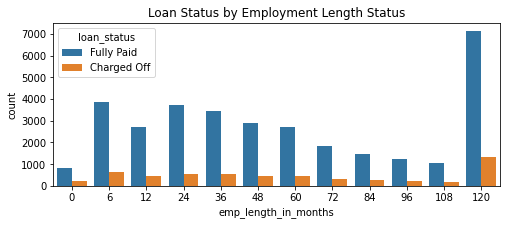

In [1529]:
plt.figure(figsize=(8, 3))
sns.countplot(x='emp_length_in_months', hue='loan_status', data=subset)
plt.title('Loan Status by Employment Length Status')
plt.show()

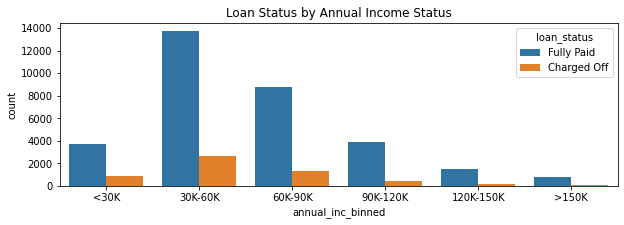

In [1530]:
bins = [0, 30_000, 60_000, 90_000, 120_000, 150_000, 200_000]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '>150K']
subset['annual_inc_binned'] = pd.cut(df['annual_inc'], bins=bins, labels=labels)

plt.figure(figsize=(10, 3))
sns.countplot(x='annual_inc_binned', hue='loan_status', data=subset)
plt.title('Loan Status by Annual Income Status')
plt.show()

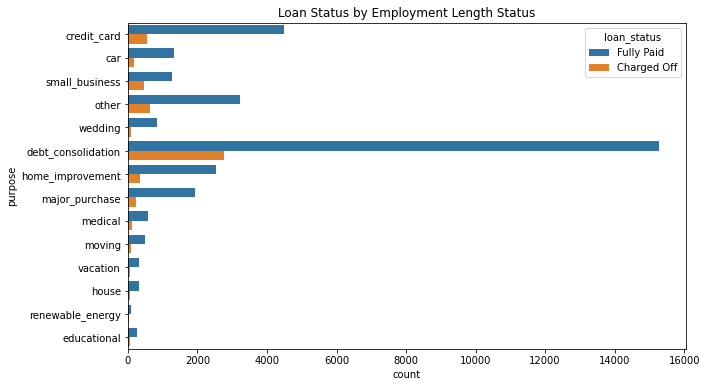

In [1531]:
plt.figure(figsize=(10, 6))
sns.countplot(y='purpose', hue='loan_status', data=subset)
plt.title('Loan Status by Employment Length Status')
plt.show()

In [1532]:
bins = [0, 30_000, 60_000, 90_000, 120_000, 150_000, 200_000]
labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '>150K']
subset.loc[:, 'annual_inc_binned'] = pd.cut(subset.loc[:, 'annual_inc'], bins=bins, labels=labels)

In [1533]:
bins = [0, 2_000, 4_000, 6_000, 8_000, 10_000, 12_000, 14_000, 16_000, 18_000, 20_000, 35_000]
labels = ['<2K', '2K-4K', '4K-6K', '6K-8K', '8K-10K', '10K-12K', '12K-14K', '14K-16K', '16K-18K', '18K-20K', '>20K']
subset.loc[:, 'loan_amnt_binned'] = pd.cut(subset.loc[:, 'loan_amnt'], bins=bins, labels=labels)

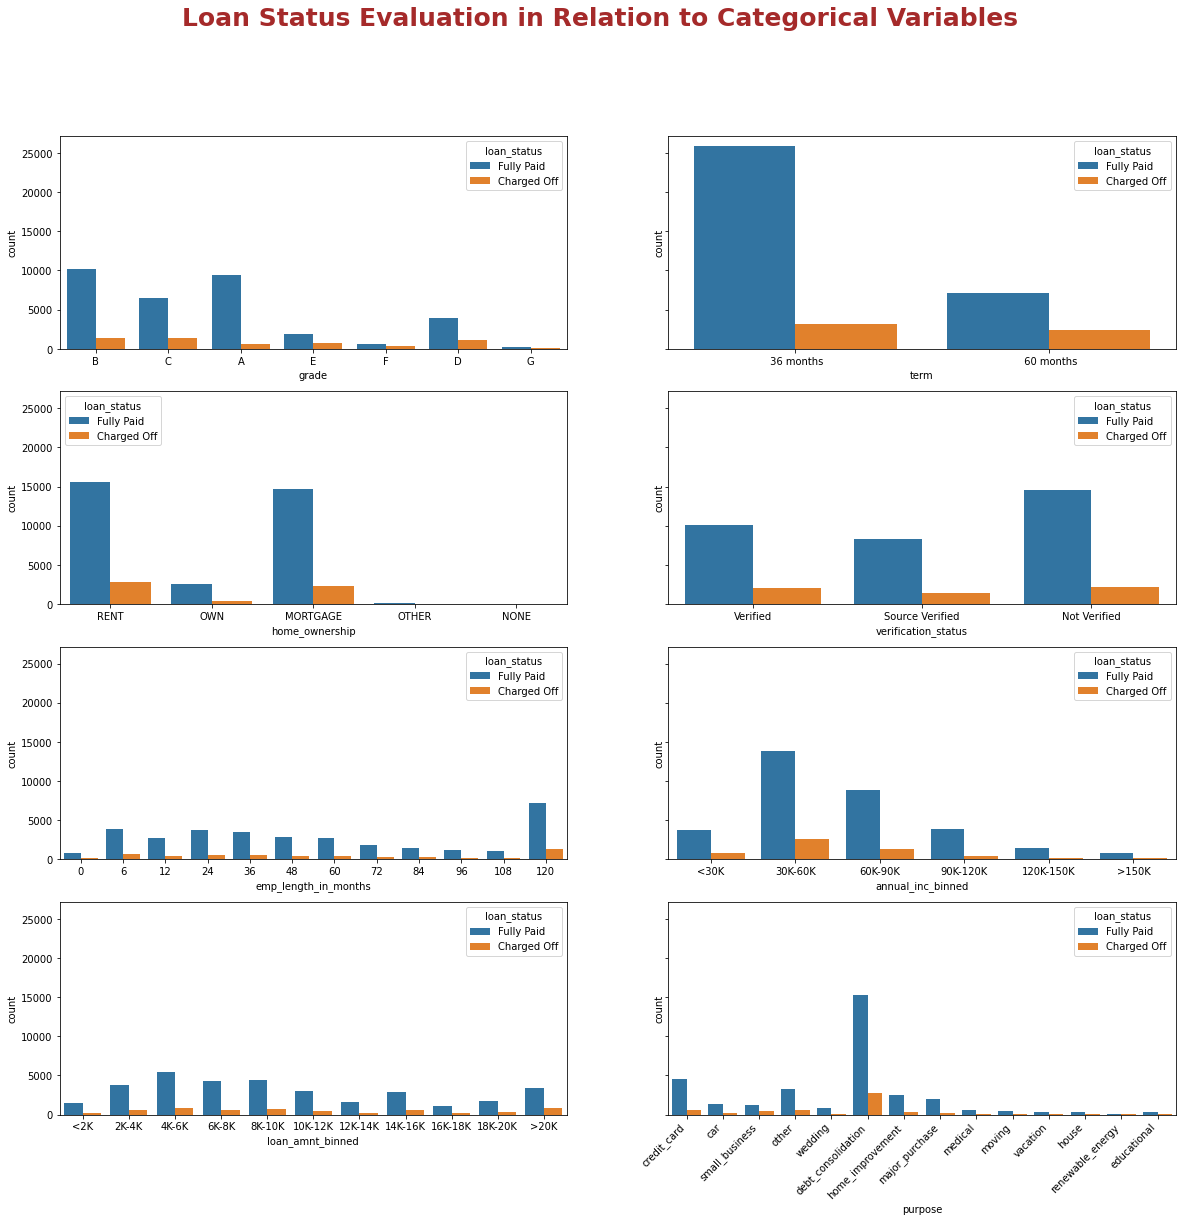

In [1534]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Loan Status Evaluation in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='loan_status', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='loan_status', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='loan_status', data=subset, ax=ax[1,0])

sns.countplot(x='verification_status', hue='loan_status', data=subset, ax=ax[1,1])

sns.countplot(x='emp_length_in_months', hue='loan_status', data=subset, ax=ax[2,0])

sns.countplot(x='annual_inc_binned', hue='loan_status', data=subset, ax=ax[2,1])

sns.countplot(x='loan_amnt_binned', hue='loan_status', data=subset, ax=ax[3,0])

sns.countplot(x='purpose', hue='loan_status', data=subset, ax=ax[3,1])
plt.setp(ax[3, 1].get_xticklabels(), rotation=45, ha="right") 
plt.savefig('loan_status_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()


1. Grade: Grades B, C, and D exhibit a higher proportion of Charged Off loans compared to Grades A, E, F, and G. This implies that loans with lower grades are more prone to default.
2. Term: Loans with a 36-month term have a slightly higher incidence of Charged Off loans in comparison to those with a 60-month term.
3. Home Ownership: Borrowers classified as RENTERS and MORTGAGE holders show a slightly greater proportion of Charged Off loans compared to those categorized as OWNERS or OTHER.
4. Verification Status: No distinct patterns were identified in this category.
5. Employment Length: Borrowers with over 10 years of employment display a slightly higher proportion of Charged Off loans. However, those with less than 1 year, as well as 2, 3, and 4 years, also exhibit some irregular trends.
6. Annual Income: The likelihood of Charged Off loans decreases as annual income rises, indicating that higher-income borrowers are less likely to default. Borrowers earning between \$30K and \$60K appear to be at a higher risk of default.
7. Purpose: Loans for debt consolidation seem to have the highest default rates (charged off), while categories such as credit card, small business, other, and home improvement also show increased risk levels.

**Based on the observations above, I will conduct a more in-depth analysis of the strong indicators.**

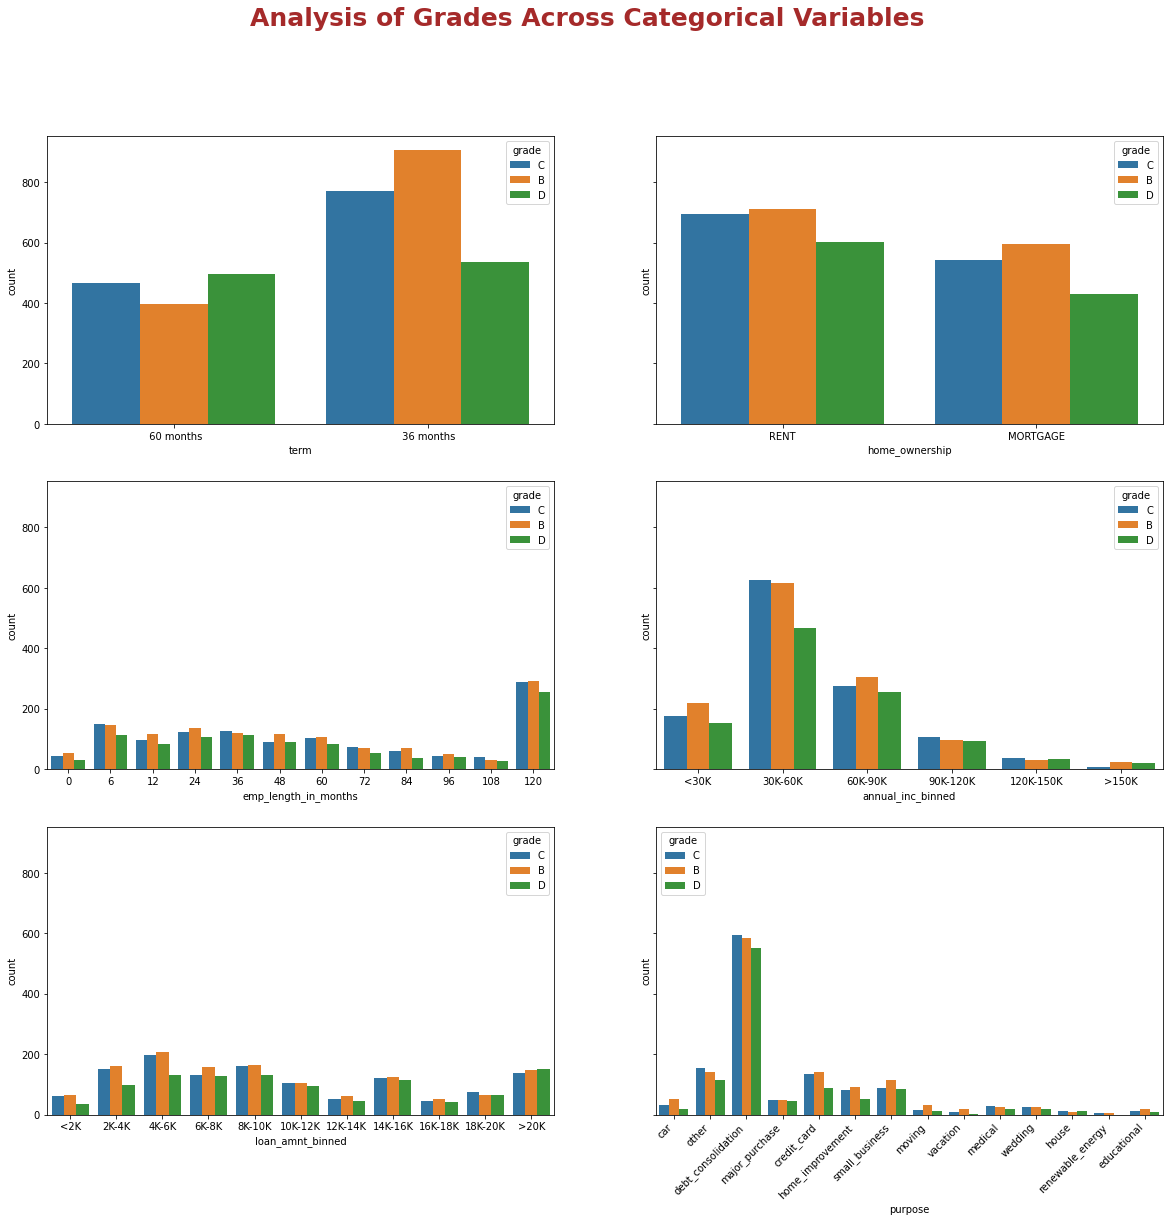

In [1535]:
subset = subset[subset.loc[:, "loan_status"] == "Charged Off"]
subset = subset[(subset["grade"] == "B") | (subset["grade"] == "C") | (subset["grade"] == "D")]

subset = subset[(subset["home_ownership"] == "RENT") | (subset["home_ownership"] == "MORTGAGE")]


fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Analysis of Grades Across Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='term', hue='grade', data=subset, ax=ax[0,0])

sns.countplot(x='home_ownership', hue='grade', data=subset, ax=ax[0,1])

sns.countplot(x='emp_length_in_months', hue='grade', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='grade', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='grade', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='grade', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right") 
plt.savefig('grades_evaluation.png', dpi=300, bbox_inches='tight')

plt.show()

**Grades B and C demonstrate a strong correlation with all other categories.**

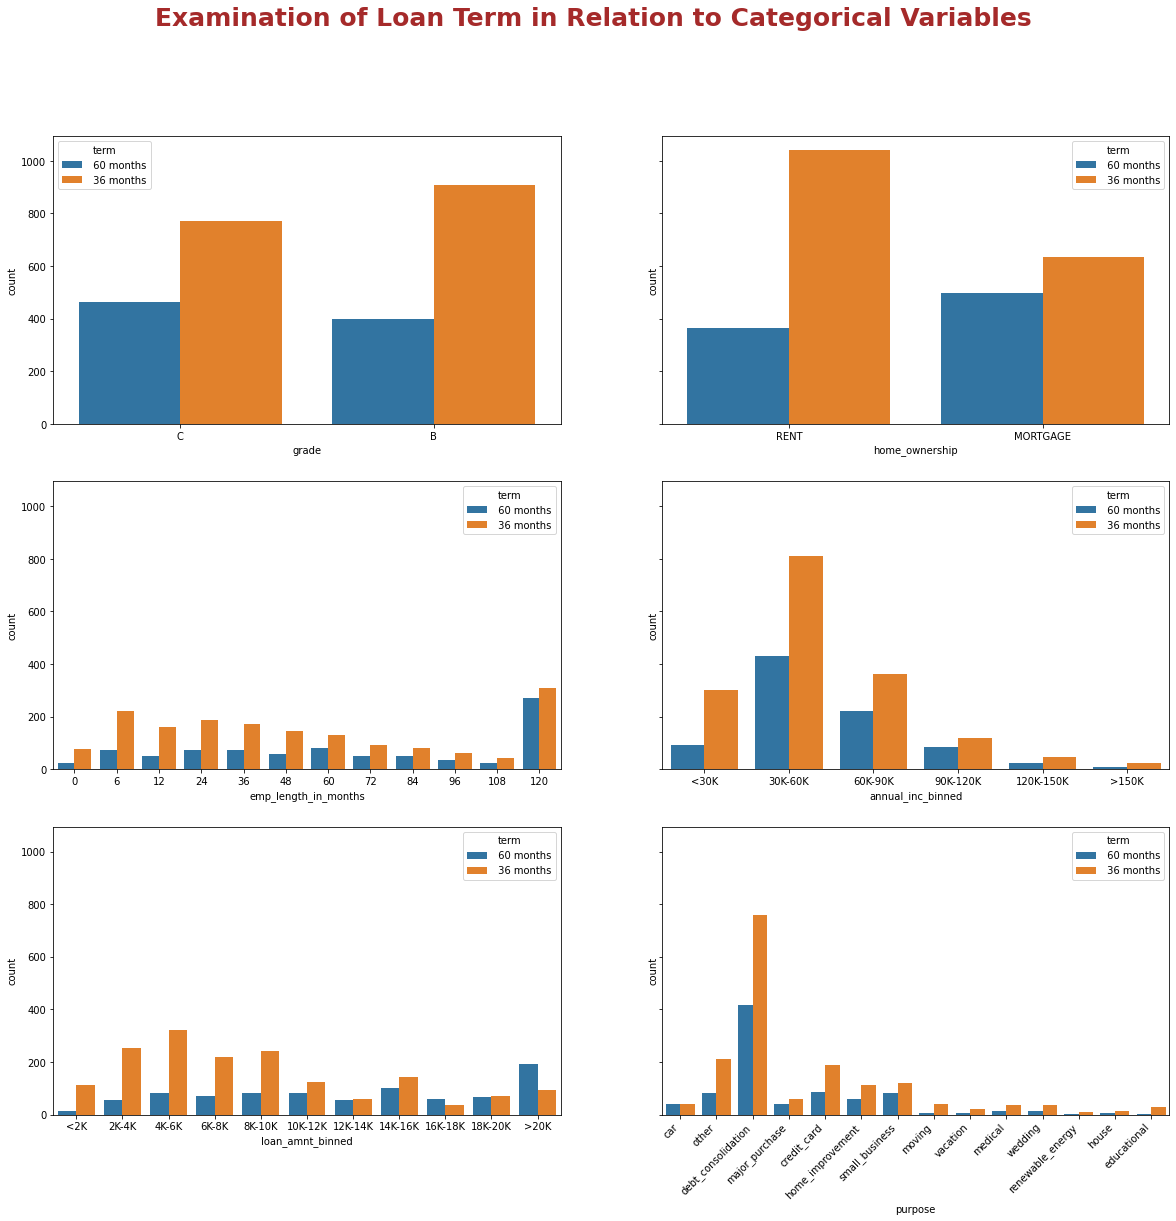

In [1536]:
subset = subset[(subset["grade"] == "B") | (subset["grade"] == "C")]


fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Examination of Loan Term in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='term', data=subset, ax=ax[0,0])

sns.countplot(x='home_ownership', hue='term', data=subset, ax=ax[0,1])

sns.countplot(x='emp_length_in_months', hue='term', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='term', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='term', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='term', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")
plt.savefig('loan_term_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()


**The 36-month duration exhibits a strong correlation with all other categories.**

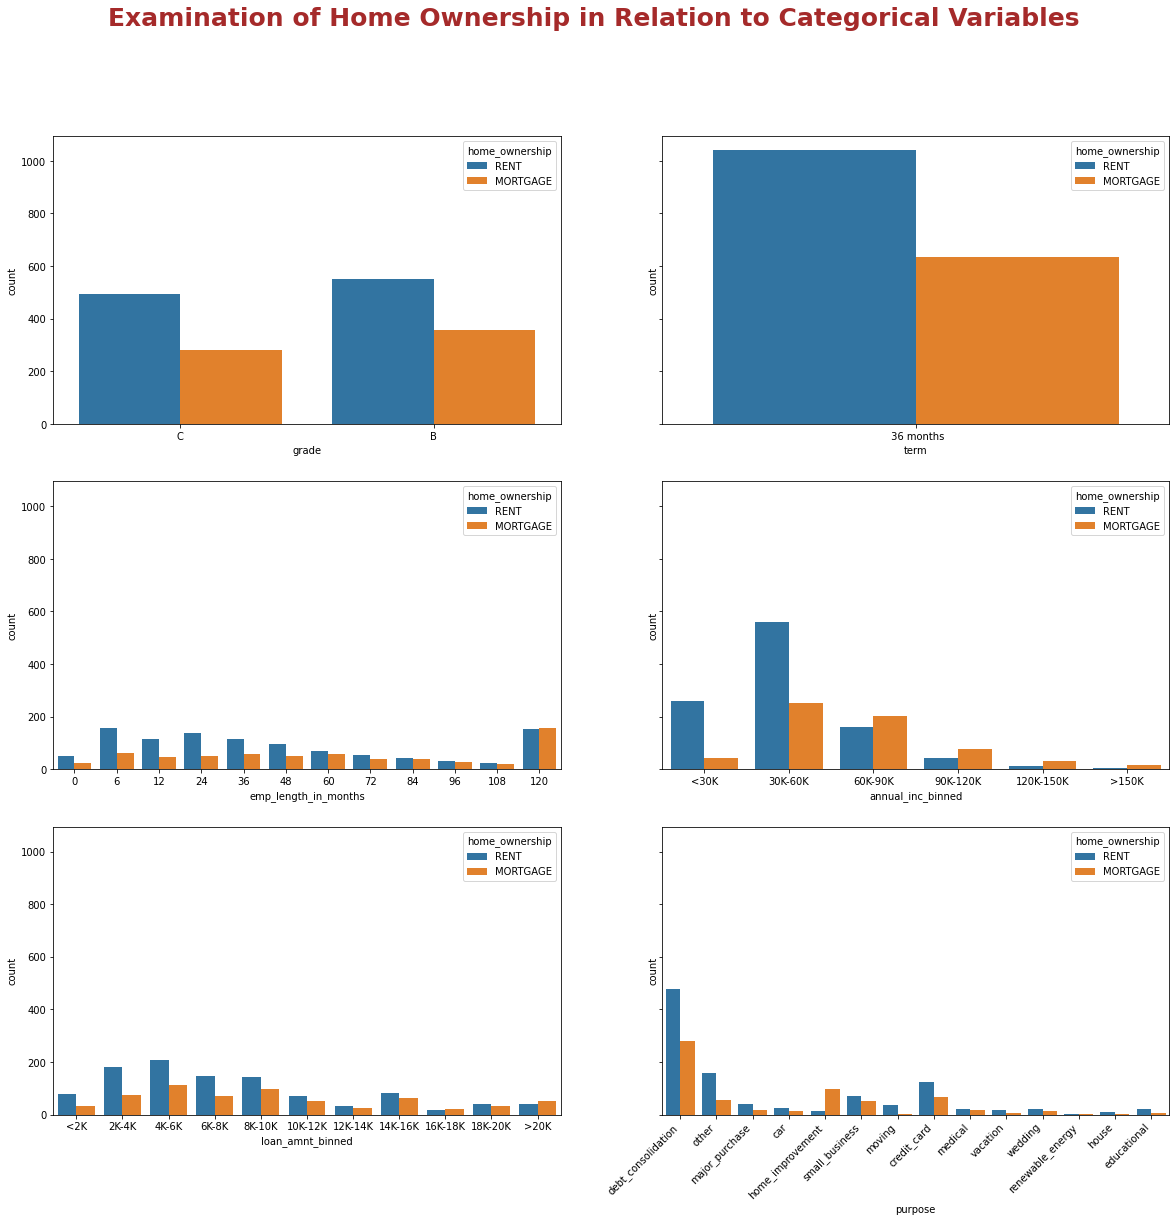

In [1537]:
subset = subset[subset.loc[:, "term"].str.strip() == "36 months"]

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Examination of Home Ownership in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='home_ownership', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='home_ownership', data=subset, ax=ax[0,1])

sns.countplot(x='emp_length_in_months', hue='home_ownership', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='home_ownership', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='home_ownership', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='home_ownership', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")
plt.savefig('home_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

**The RENT category demonstrates a strong correlation with all other categories, except for employment length. Therefore, we will not filter this variable.**

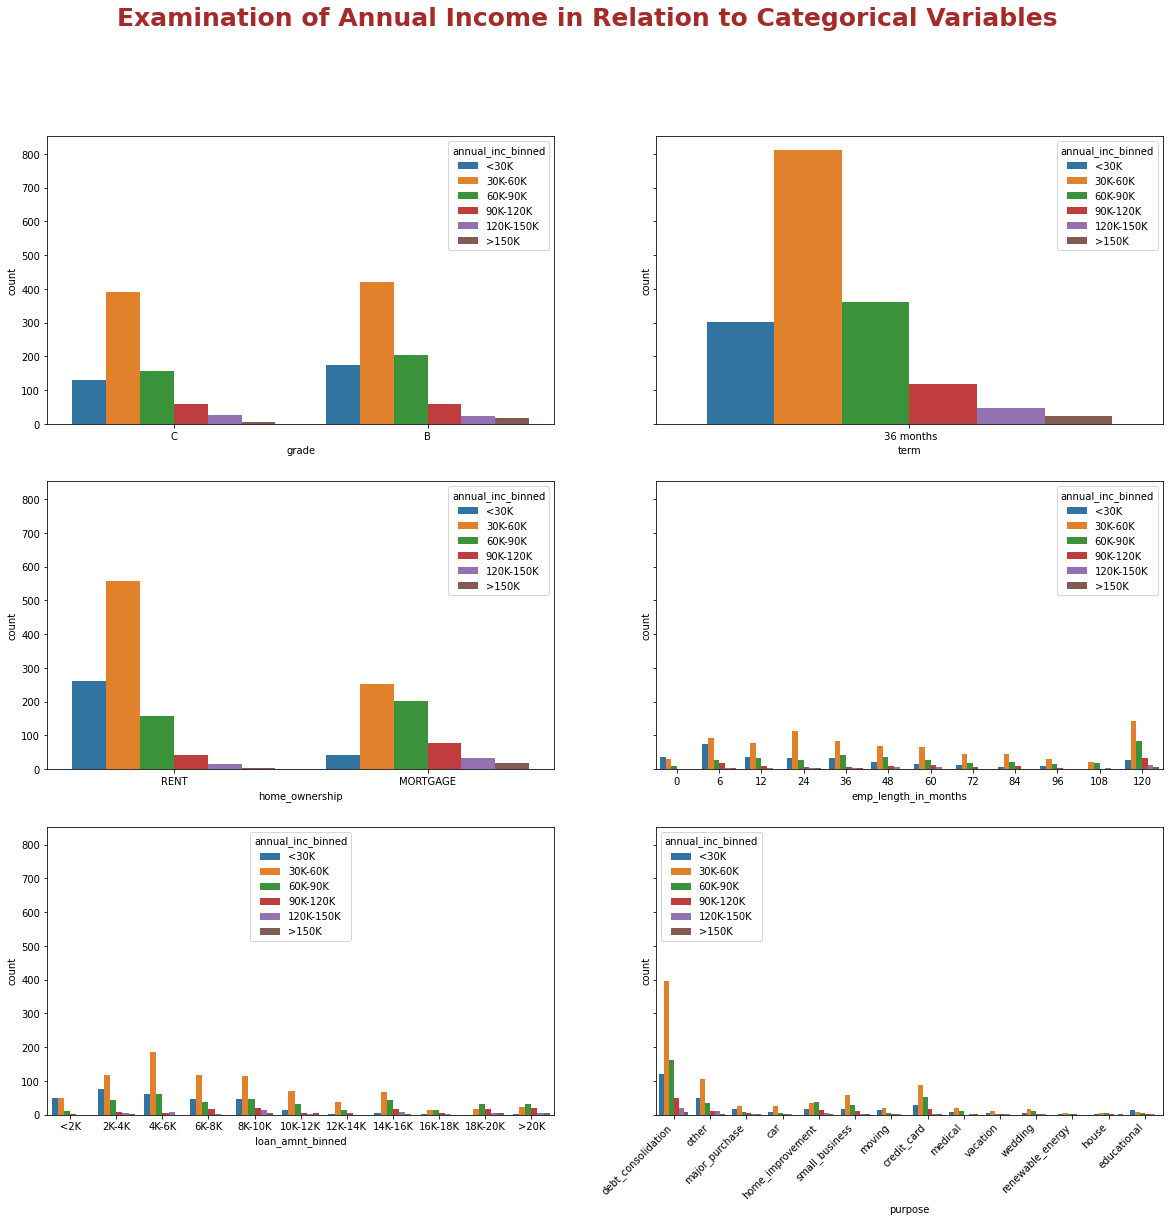

In [1538]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)
2
fig.suptitle('Examination of Annual Income in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='annual_inc_binned', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='annual_inc_binned', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='annual_inc_binned', data=subset, ax=ax[1,0])

sns.countplot(x='emp_length_in_months', hue='annual_inc_binned', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='annual_inc_binned', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='annual_inc_binned', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")
plt.savefig('annual_income_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

**An annual income range of $30K to $60K exhibits a strong correlation with all other categories. Therefore, we will proceed to filter this variable.**

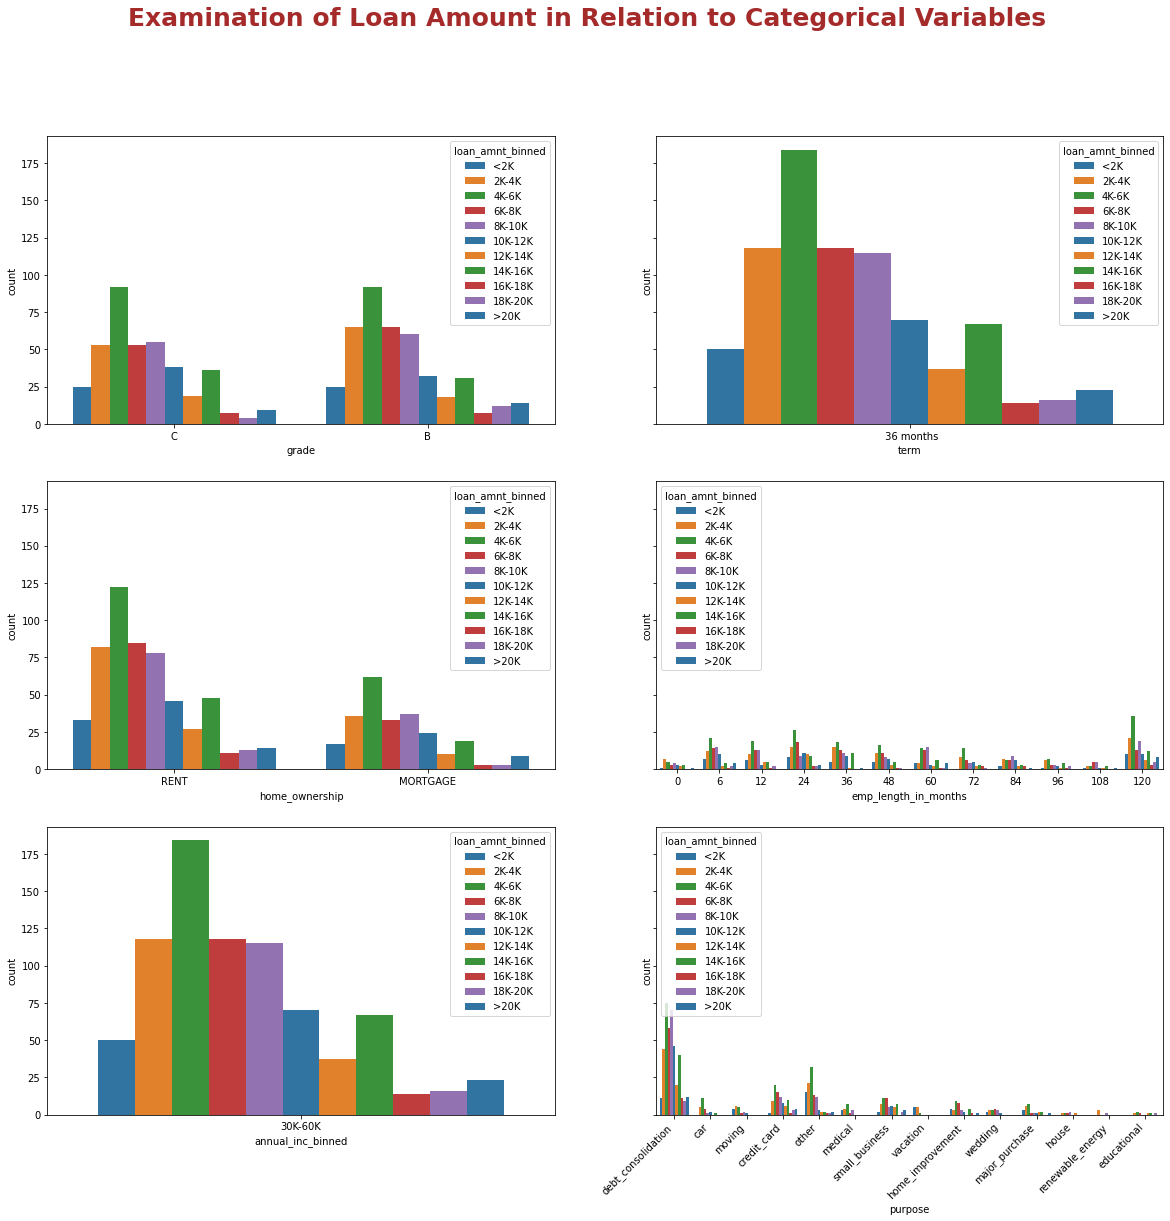

In [1539]:
subset = subset[subset["annual_inc_binned"] == "30K-60K"].copy()
subset["annual_inc_binned"] = '30K-60K'

fig, ax = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Examination of Loan Amount in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

sns.countplot(x='grade', hue='loan_amnt_binned', data=subset, ax=ax[0, 0], palette=custom_palette)
sns.countplot(x='term', hue='loan_amnt_binned', data=subset, ax=ax[0, 1], palette=custom_palette)
sns.countplot(x='home_ownership', hue='loan_amnt_binned', data=subset, ax=ax[1, 0], palette=custom_palette)
sns.countplot(x='emp_length_in_months', hue='loan_amnt_binned', data=subset, ax=ax[1, 1], palette=custom_palette)
sns.countplot(x='annual_inc_binned', hue='loan_amnt_binned', data=subset, ax=ax[2, 0], palette=custom_palette)
sns.countplot(x='purpose', hue='loan_amnt_binned', data=subset, ax=ax[2, 1], palette=custom_palette)

plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")
plt.savefig('locan_amount_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

**A loan amount ranging from $4K to $6K demonstrates a strong correlation with all other categories. Therefore, we will filter this variable.**

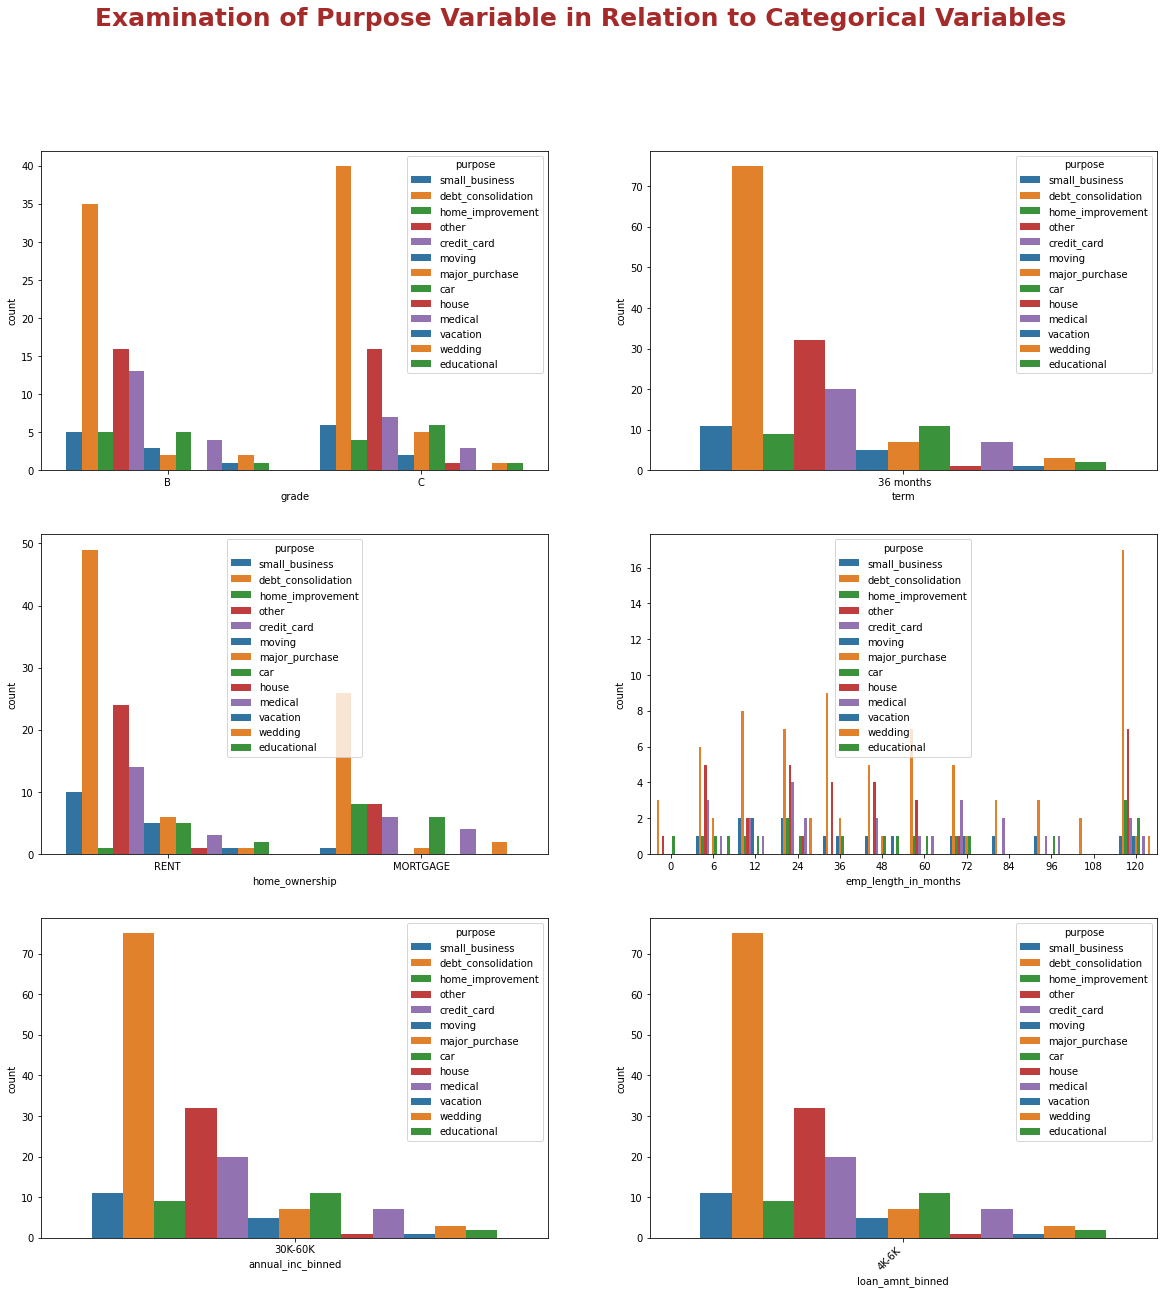

In [1540]:
subset = subset[subset["loan_amnt_binned"] == "4K-6K"].copy()
subset["loan_amnt_binned"] = '4K-6K'


subset = subset[subset["loan_amnt_binned"] == "4K-6K"].copy()
subset["loan_amnt_binned"] = '4K-6K'

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=False)
fig.set_size_inches(20, 20, forward=True)

fig.suptitle('Examination of Purpose Variable in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

sns.countplot(x='grade', hue='purpose', data=subset, ax=ax[0,0], palette=custom_palette)

sns.countplot(x='term', hue='purpose', data=subset, ax=ax[0,1], palette=custom_palette)

sns.countplot(x='home_ownership', hue='purpose', data=subset, ax=ax[1,0], palette=custom_palette)

sns.countplot(x='emp_length_in_months', hue='purpose', data=subset, ax=ax[1,1], palette=custom_palette)

sns.countplot(x='annual_inc_binned', hue='purpose', data=subset, ax=ax[2,0], palette=custom_palette)

sns.countplot(x='loan_amnt_binned', hue='purpose', data=subset, ax=ax[2,1], palette=custom_palette)
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right")
plt.savefig('purpose_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

**Debt consolidation demonstrates a strong correlation with all other categories. Therefore, we will proceed to filter this variable.**

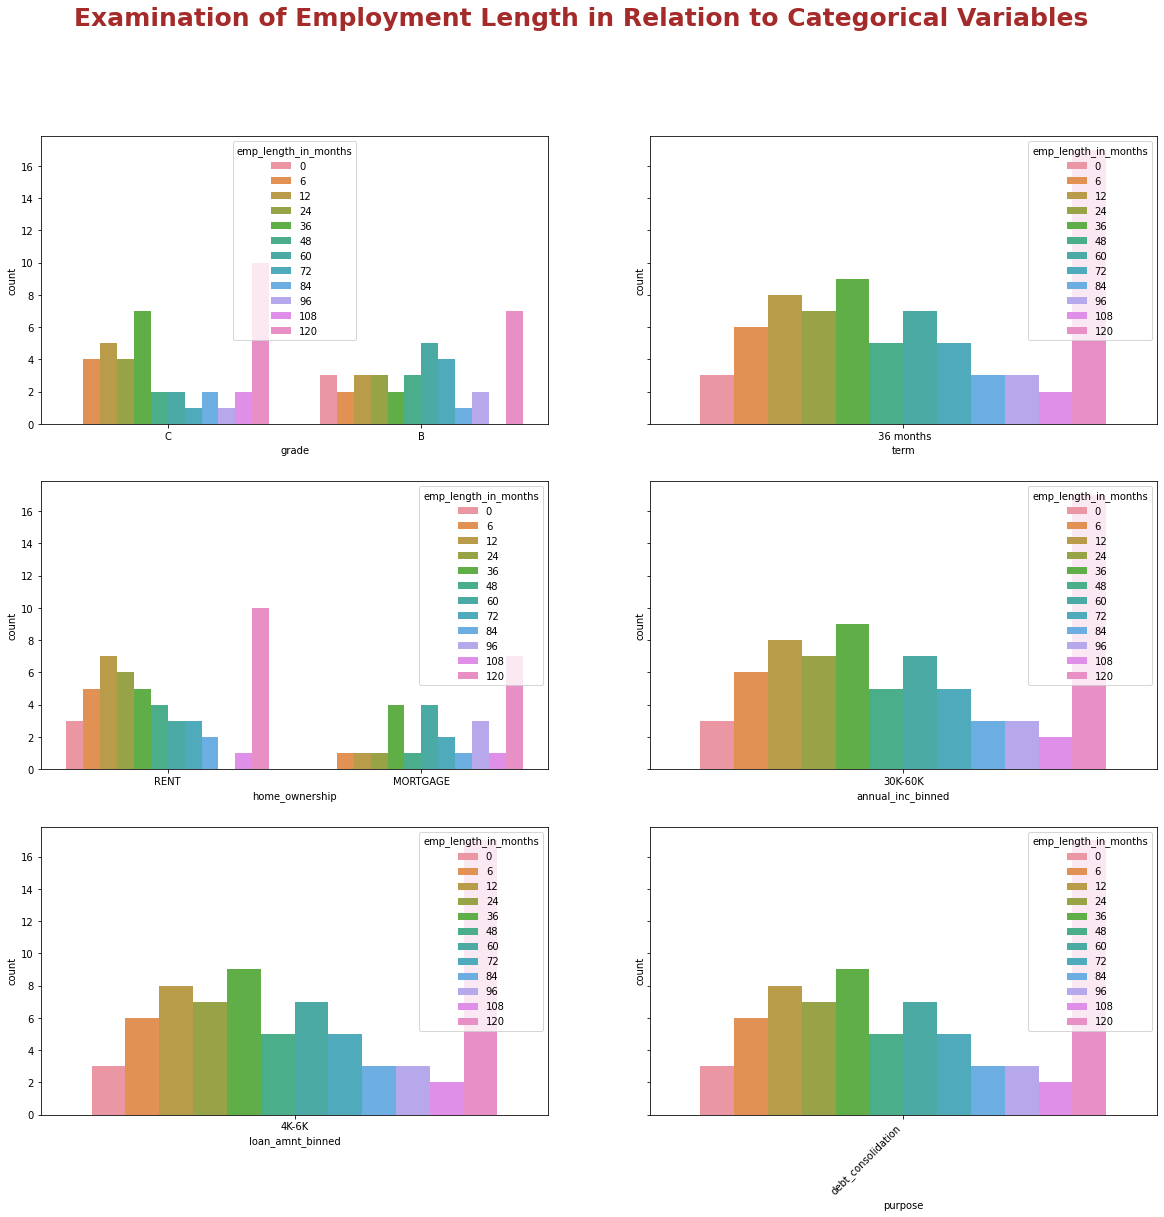

In [1541]:
subset = subset[subset["purpose"] == "debt_consolidation"]

fig, ax = plt.subplots(nrows = 3, ncols = 2, sharex=False, sharey=True)
fig.set_size_inches(20, 18, forward=True)

fig.suptitle('Examination of Employment Length in Relation to Categorical Variables', fontsize=25, fontweight='bold', color='brown')

sns.countplot(x='grade', hue='emp_length_in_months', data=subset, ax=ax[0,0])

sns.countplot(x='term', hue='emp_length_in_months', data=subset, ax=ax[0,1])

sns.countplot(x='home_ownership', hue='emp_length_in_months', data=subset, ax=ax[1,0])

sns.countplot(x='annual_inc_binned', hue='emp_length_in_months', data=subset, ax=ax[1,1])

sns.countplot(x='loan_amnt_binned', hue='emp_length_in_months', data=subset, ax=ax[2,0])

sns.countplot(x='purpose', hue='emp_length_in_months', data=subset, ax=ax[2,1])
plt.setp(ax[2, 1].get_xticklabels(), rotation=45, ha="right") 
plt.savefig('emp_length_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

**An employment length of 10 or more years exhibits a strong correlation with all other categories.**

**Ultimately, the probability of loan defaults is associated with the following combinations:**

1. Grade: B, C
2. Term: 36 months
3. Home Ownership: RENT
4. Employment Length: 10+ years
5. Annual Income: $30K
6. Loan Amount: $4K-$6K
7. Purpose: Debt Consolidation (up to $60K)

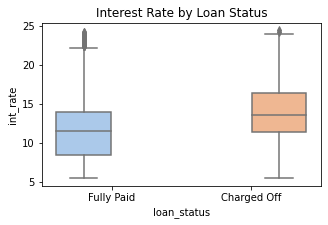

In [1542]:
subset = df[(df["loan_status"] == "Charged Off") | (df["loan_status"] == "Fully Paid")].copy()
plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='int_rate', data=subset, hue='loan_status', palette='pastel')
plt.title('Interest Rate by Loan Status')
plt.legend([],[], frameon=False)
plt.show()

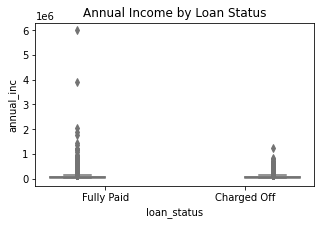

In [1543]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='annual_inc', data=subset, hue='loan_status', palette='pastel')
plt.legend([],[], frameon=False)
plt.title('Annual Income by Loan Status')
plt.show()

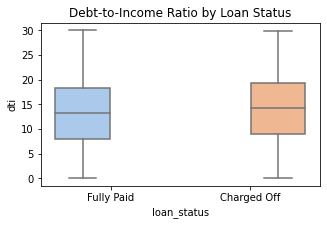

In [1544]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='loan_status', y='dti', data=subset, hue='loan_status', palette='pastel')
plt.legend([], [], frameon=False)
plt.title('Debt-to-Income Ratio by Loan Status')
plt.show()

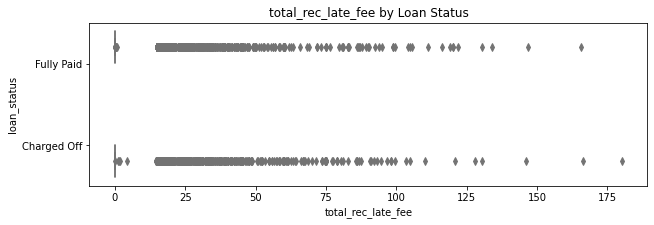

In [1545]:
plt.figure(figsize=(10, 3))
sns.boxplot(y='loan_status', x='total_rec_late_fee', data=subset, hue='loan_status', palette='pastel')
plt.legend([], [], frameon=False)
plt.title('total_rec_late_fee by Loan Status')
plt.show()

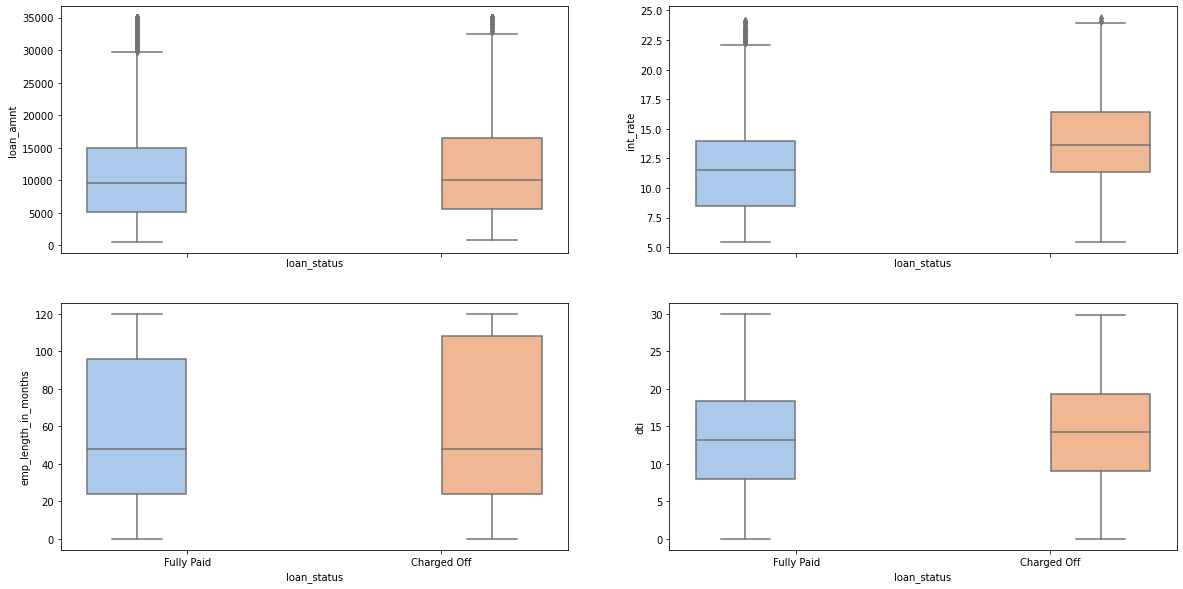

In [1546]:
emp_length_in_months = pd.to_numeric(emp_length_modified, errors='coerce') * 12

subset.loc[:, 'emp_length_in_months'] = emp_length_in_months.fillna(0).astype(int)
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=False)

sns.boxplot(x='loan_status', y='loan_amnt', data=subset, ax=ax[0,0], hue='loan_status', palette='pastel')

sns.boxplot(x='loan_status', y='int_rate', data=subset, ax=ax[0,1], hue='loan_status', palette='pastel')

sns.boxplot(x='loan_status', y='emp_length_in_months', data=subset, ax=ax[1,0], hue='loan_status', palette='pastel')

sns.boxplot(x='loan_status', y='dti', data=subset, ax=ax[1,1], hue='loan_status', palette='pastel')


fig.set_size_inches(20, 10, forward=True)

for axes in ax.flat:
    axes.legend_.remove()

plt.show()

1. Loan Amount: The distribution of loan amounts for charged-off loans is more dispersed.
2. Interest Rate: The distribution of interest rates for charged-off loans also shows greater variability, featuring a longer tail on the right side. This indicates that borrowers with higher interest rates are more likely to default.
3. Employment Length: The distribution of employment lengths for charged-off loans is more spread out, suggesting that employment length is not a strong predictor of default.
4. Debt-to-Income Ratio: There is no clear pattern observed in the distribution of debt-to-income ratios.

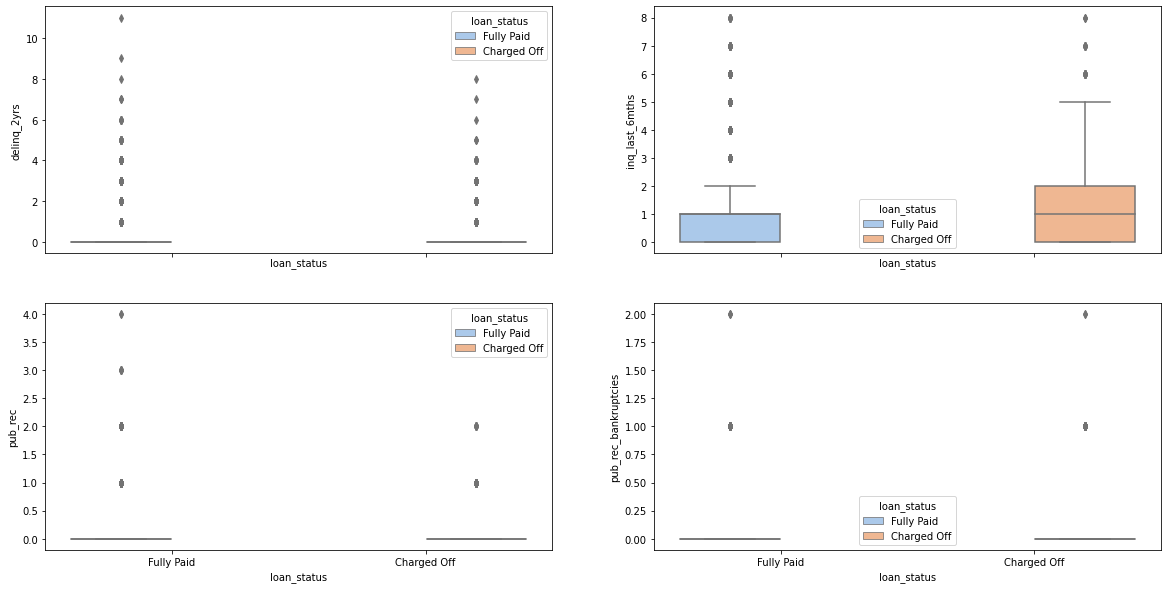

In [1547]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey=False)

sns.boxplot(x='loan_status', y='delinq_2yrs', data=subset, ax=ax[0,0], hue='loan_status', palette='pastel')

sns.boxplot(x='loan_status', y='inq_last_6mths', data=subset, ax=ax[0,1], hue='loan_status', palette='pastel')

sns.boxplot(x='loan_status', y='pub_rec', data=subset, ax=ax[1,0], hue='loan_status', palette='pastel')

sns.boxplot(x='loan_status', y='pub_rec_bankruptcies', data=subset, ax=ax[1,1], hue='loan_status', palette='pastel')

fig.set_size_inches(20, 10, forward=True)

plt.show()

1. Delinquencies in the Past 2 Years: No discernible pattern is observed.
2. Inquiries in the Last 6 Months: The median number of inquiries for charged-off loans is somewhat higher than for fully paid loans. Additionally, the distribution of inquiries for charged-off loans exhibits greater spread, with a longer tail on the right side. This implies that borrowers with a higher number of inquiries may have an increased likelihood of defaulting.
3. Public Records: No discernible pattern is observed.
4. Public Record Bankruptcies: No discernible pattern is observed.

**Key Factors to Forecast Loan Default Probability and Mitigate Credit Loss:**

1. Loan Grade: Borrowers classified with a loan grade of B or C demonstrate a greater tendency to default.
2. Loan Term: Loans with a term of 36 months exhibit a slightly higher default rate in comparison to those with a 60-month term.
3. Home Ownership Status: Renters are more susceptible to default than homeowners, highlighting "RENT" as a significant risk factor.
4. Employment Length: Borrowers with over 10 years of employment experience show a marginally higher default risk than those with shorter employment durations.
5. Annual Income: Individuals earning between $30,000 and $60,000 are at an increased risk of default. Furthermore, the analysis reveals that default probability declines as income increases, with lower-income groups facing greater risks.
6. Loan Amount: Borrowers seeking loans in the range of $4,000 to $6,000, especially for debt consolidation purposes, have a heightened likelihood of default.
7. Loan Purpose: Loans aimed at debt consolidation and credit card refinancing exhibit higher default rates. Other categories, including small business loans, general loans (classified as "other"), and home improvement loans, also present significant risk.
8. Credit Inquiries in the Last 6 Months: Borrowers with a greater number of credit inquiries in the preceding six months are more likely to default, suggesting a correlation between recent credit activity and default risk.